In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
# 讀取資料
df = pd.read_csv('L13_Train.csv')
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,13,2024-01-26 16:01:40.000,0.0,1020.38,22.42,48.14,450.42,0.01
1,13,2024-01-26 16:02:40.000,0.0,1020.41,22.46,48.03,455.83,0.01
2,13,2024-01-26 16:03:40.000,0.0,1020.37,22.47,47.96,456.67,0.01
3,13,2024-01-26 16:04:40.000,0.0,1020.36,22.48,47.90,453.33,0.01
4,13,2024-01-26 16:05:40.000,0.0,1020.37,22.49,47.87,453.33,0.01
...,...,...,...,...,...,...,...,...
69501,13,2024-07-18 17:53:20.000,0.0,1004.70,33.16,57.81,1654.17,0.22
69502,13,2024-07-18 17:54:20.000,0.0,1004.69,33.17,57.67,1610.83,0.22
69503,13,2024-07-18 17:55:20.000,0.0,1004.67,33.19,57.63,1565.00,0.21
69504,13,2024-07-18 17:56:20.000,0.0,1004.70,33.19,57.83,1520.00,0.20


In [5]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,69506.0,69506.000000,69506.000000,69506.000000,69506.000000,69506.000000,69506.000000
mean,13.0,0.366822,1010.604880,28.640541,64.287764,19641.706710,207.352840
std,0.0,0.851155,5.890474,8.750764,24.066531,26563.986866,439.396074
min,13.0,0.000000,998.690000,10.220000,12.680000,20.000000,0.000000
25%,13.0,0.000000,1005.960000,21.270000,44.650000,3340.830000,2.740000
50%,13.0,0.000000,1010.390000,27.645000,64.520000,8825.830000,20.450000
75%,13.0,0.000000,1015.230000,35.150000,85.860000,23015.830000,131.025000
max,13.0,7.490000,1025.710000,55.690000,100.000000,117758.200000,2576.020000


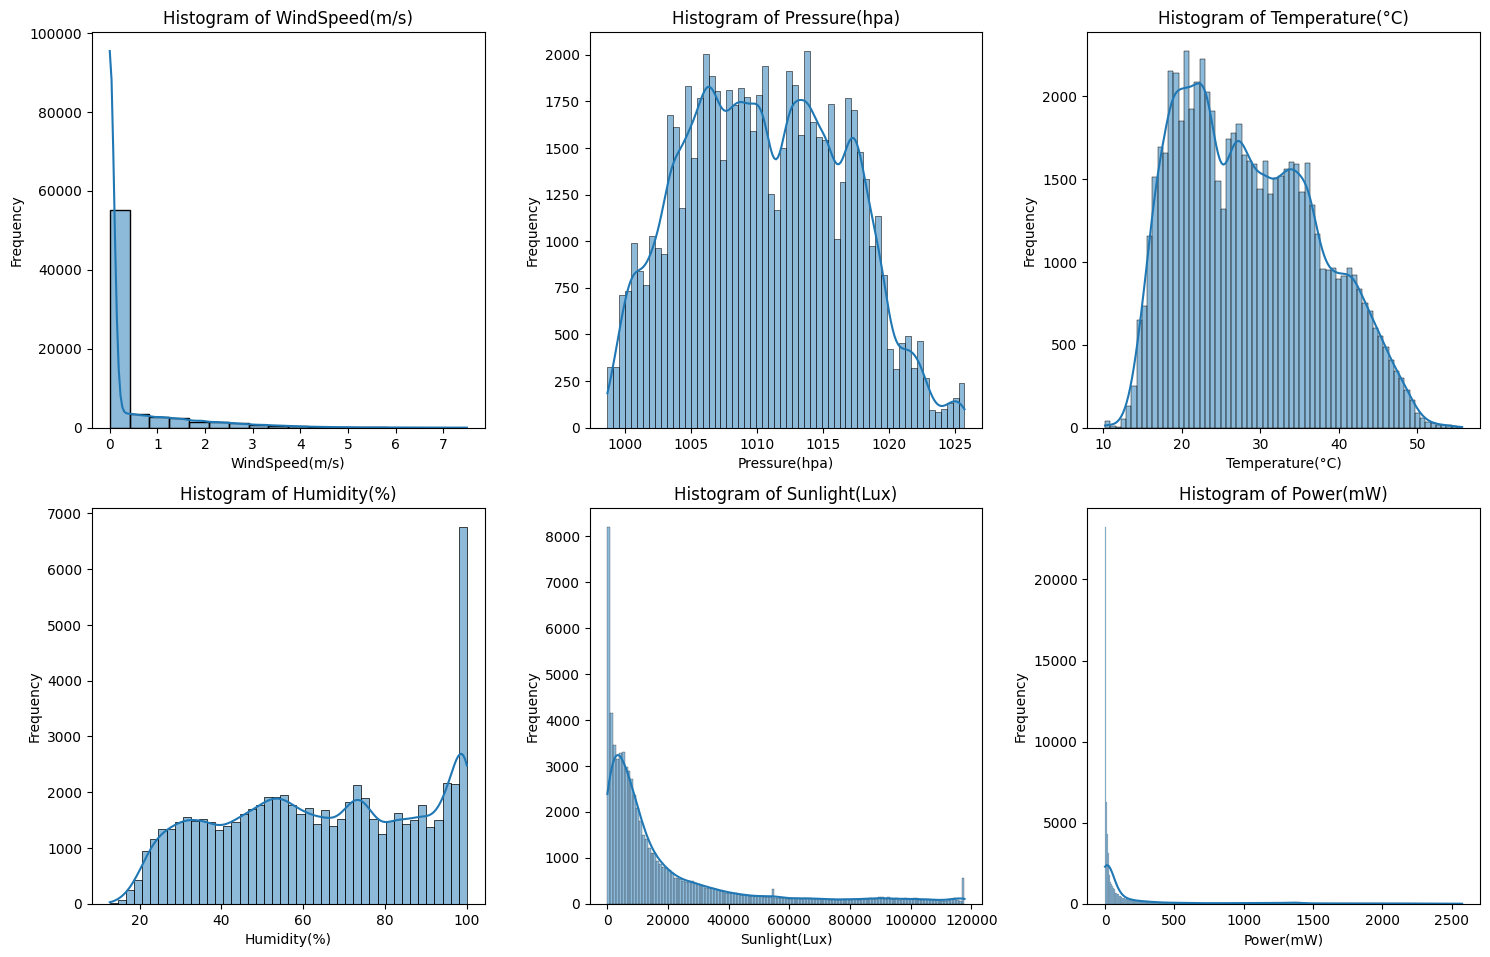

In [6]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [7]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
437,13,2024-02-02 11:16:32.000,0.44,1014.18,35.13,35.50,117758.2,2285.88
438,13,2024-02-02 11:17:31.000,1.05,1014.14,36.24,33.72,117758.2,2225.04
439,13,2024-02-02 11:18:31.000,0.87,1014.13,37.53,31.57,117758.2,2200.06
1029,13,2024-02-03 12:49:14.000,1.83,1014.40,32.24,46.28,117758.2,2296.45
1030,13,2024-02-03 12:50:14.000,1.83,1014.38,32.04,45.63,117758.2,2154.03
...,...,...,...,...,...,...,...,...
67552,13,2024-07-16 13:14:22.000,0.00,1004.70,40.68,35.12,117758.2,1402.55
68384,13,2024-07-17 13:11:21.000,0.00,1005.09,41.95,33.71,117758.2,1395.06
68386,13,2024-07-17 13:13:21.000,0.00,1005.09,41.92,33.22,117758.2,1397.81
68387,13,2024-07-17 13:14:21.000,0.00,1005.08,41.27,34.73,117758.2,1405.30


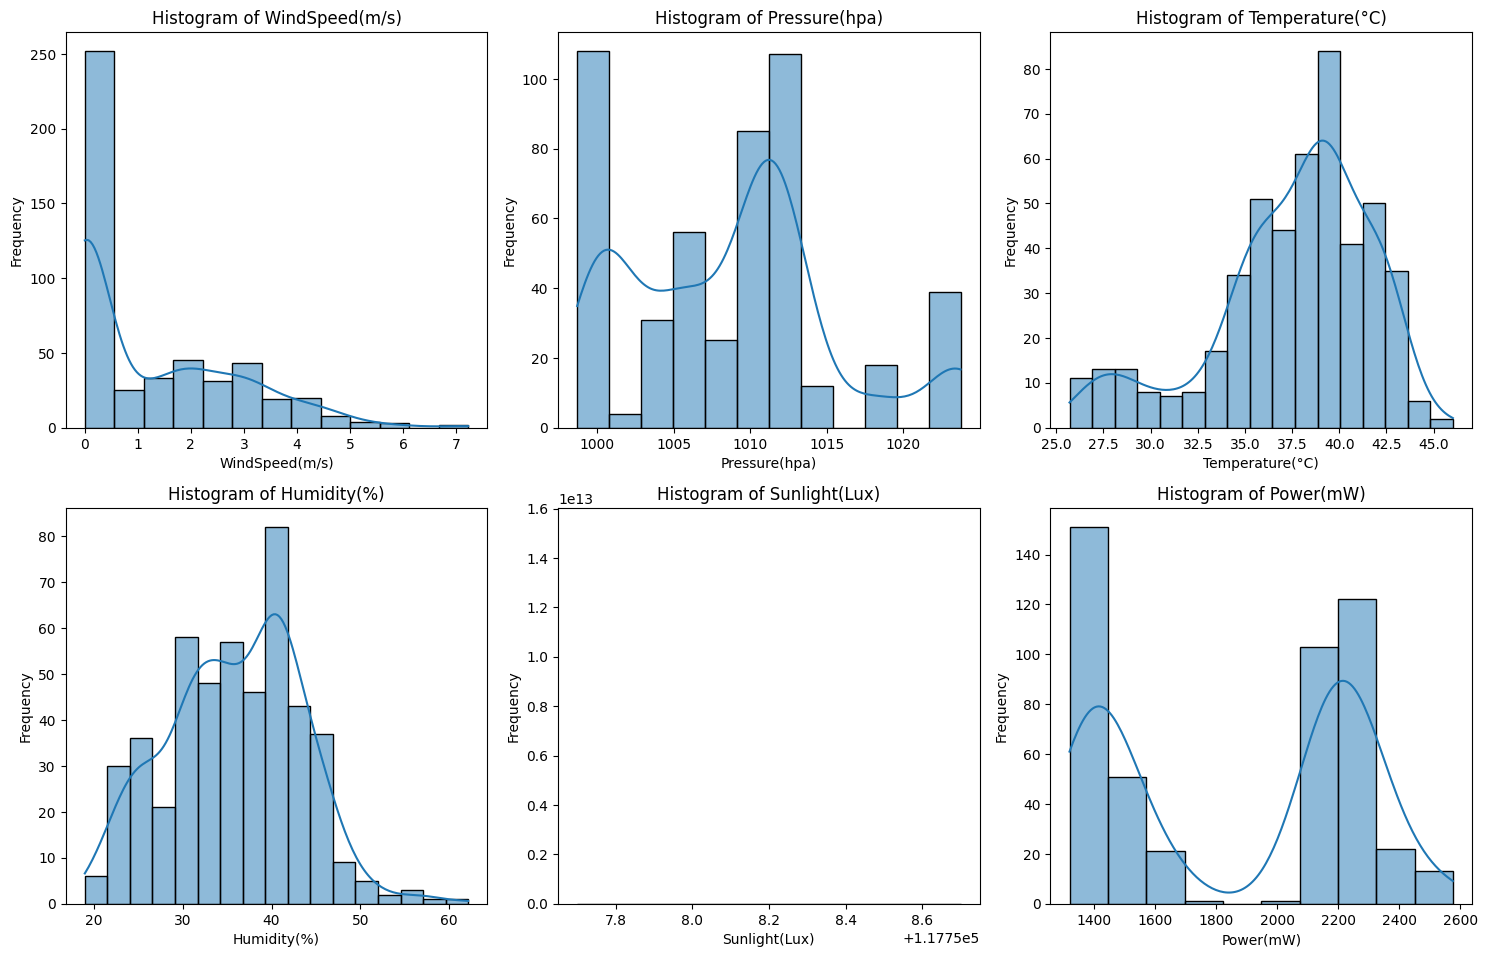

In [8]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [9]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0150 * Sunlight(Lux) + -88.6218


In [10]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.015
intercept = -88.6218

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [11]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,69506.0,69506.000000,69506.000000,69506.000000,69506.000000,69506.000000,69506.000000
mean,13.0,0.366822,1010.604880,28.640541,64.287764,19729.944885,207.352840
std,0.0,0.851155,5.890474,8.750764,24.066531,27004.845878,439.396074
min,13.0,0.000000,998.690000,10.220000,12.680000,20.000000,0.000000
25%,13.0,0.000000,1005.960000,21.270000,44.650000,3340.830000,2.740000
50%,13.0,0.000000,1010.390000,27.645000,64.520000,8825.830000,20.450000
75%,13.0,0.000000,1015.230000,35.150000,85.860000,23015.830000,131.025000
max,13.0,7.490000,1025.710000,55.690000,100.000000,177642.786667,2576.020000


In [12]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [13]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240126160113,0.00,1018.61,22.71,50.18,360.92,0.01
1,20240130173613,0.00,1016.03,22.87,54.02,185.33,0.02
2,20240130174613,0.00,1016.07,22.80,54.12,185.71,0.03
3,20240201160013,1.31,1012.14,25.93,63.28,5063.92,5.72
4,20240201161013,0.95,1012.25,25.80,64.21,4573.92,4.75
...,...,...,...,...,...,...,...
6946,20240718171213,0.00,1004.26,33.70,55.68,4395.58,2.11
6947,20240718172213,0.00,1004.32,33.68,55.22,3779.83,1.43
6948,20240718173213,0.00,1004.39,33.55,55.21,2910.83,0.76
6949,20240718174213,0.00,1004.52,33.32,56.63,1945.33,0.31


# HEATMAP

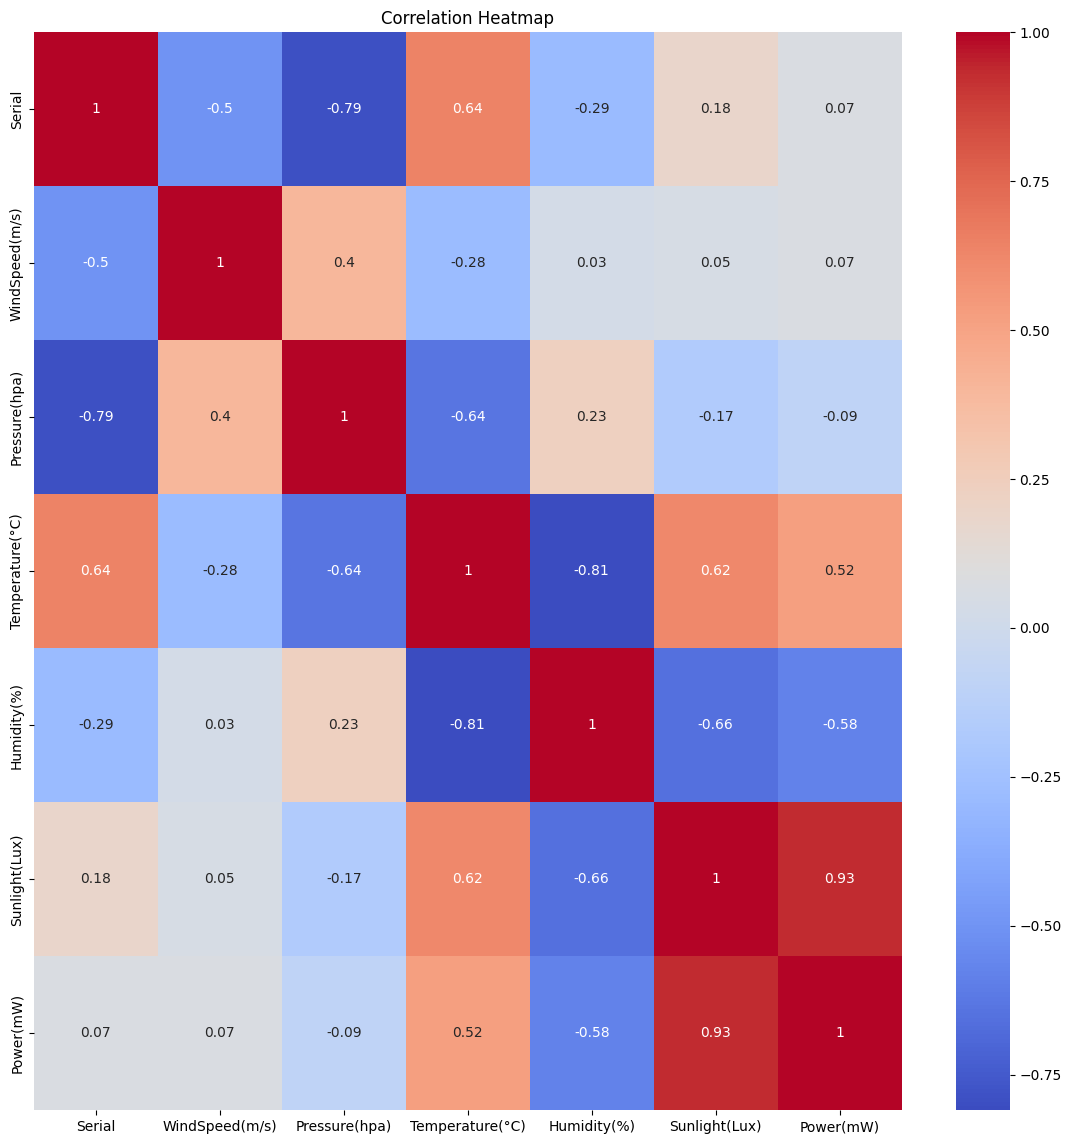

In [14]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.929043
Humidity(%)        0.576577
Temperature(°C)    0.516371
Pressure(hpa)      0.088702
WindSpeed(m/s)     0.070985
Serial             0.068178
Name: Power(mW), dtype: float64

In [16]:
df.to_csv('L13_Train_Revise.csv', index=False)